Preconfigure plot settings:

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Load training dataset:

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

2023-07-02 20:06:51.601030: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-02 20:06:51.621432: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 20:06:51.937134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Validate the training dataset:

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype


dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

Plot an example from dataset:

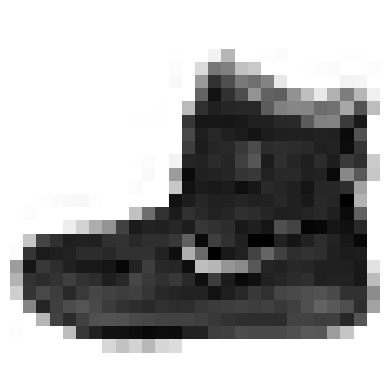

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Show the labels:

In [7]:
y_train


array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# Example to check if it worked
class_names[y_train[0]]

'Ankle boot'

Let's take a look at a sample of the images in the dataset:

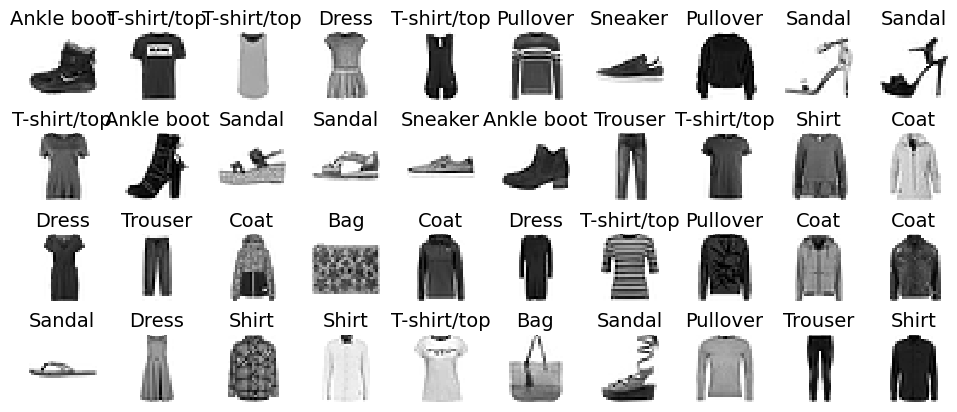

In [10]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


Creating the model using the Sequential API:

In [11]:
tf.random.set_seed(420)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-07-02 20:06:53.409298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 20:06:53.438181: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers


In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[-3.8534831e-02, -6.4628050e-03, -3.7278689e-02, ...,
        -2.1785986e-02,  8.1025064e-04, -2.6234642e-02],
       [-2.3191214e-02, -6.2166281e-02, -1.2248058e-02, ...,
         4.0836938e-02,  1.8443234e-02, -7.1840912e-02],
       [-3.2123964e-02,  4.1606173e-02, -5.0982669e-02, ...,
         5.9721857e-02, -4.0846359e-02, -5.1264260e-02],
       ...,
       [-9.7572803e-05,  4.2610243e-02, -2.3039024e-02, ...,
        -5.2582964e-02, -5.2717626e-03,  5.2946851e-02],
       [ 6.1408132e-03, -2.2969157e-02,  3.8338169e-02, ...,
         2.5979869e-02,  2.2969648e-02, -6.5361708e-03],
       [-2.8384626e-03, -1.2890577e-02,  5.3161383e-02, ...,
        -7.0949852e-02, -5.8860283e-02,  3.0995853e-02]], dtype=float32)

In [19]:
weights.shape


(784, 300)

In [20]:
biases


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape


(300,)

Compiling the model:

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Train the model:

In [23]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 805us/step - loss: 0.7047 - accuracy: 0.7664 - val_loss: 0.5281 - val_accuracy: 0.8130
Epoch 2/30
1719/1719 [==============================] - 2s 926us/step - loss: 0.4854 - accuracy: 0.8322 - val_loss: 0.4701 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 1s 792us/step - loss: 0.4406 - accuracy: 0.8466 - val_loss: 0.4168 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 1s 788us/step - loss: 0.4139 - accuracy: 0.8551 - val_loss: 0.4024 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 2s 941us/step - loss: 0.3927 - accuracy: 0.8633 - val_loss: 0.3901 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 2s 921us/step - loss: 0.3764 - accuracy: 0.8675 - val_loss: 0.4148 - val_accuracy: 0.8510
Epoch 7/30
1719/1719 [==============================] - 2s 947us/step - loss: 0.3624 - accuracy: 0.8715 - val_loss: 0.3642 -

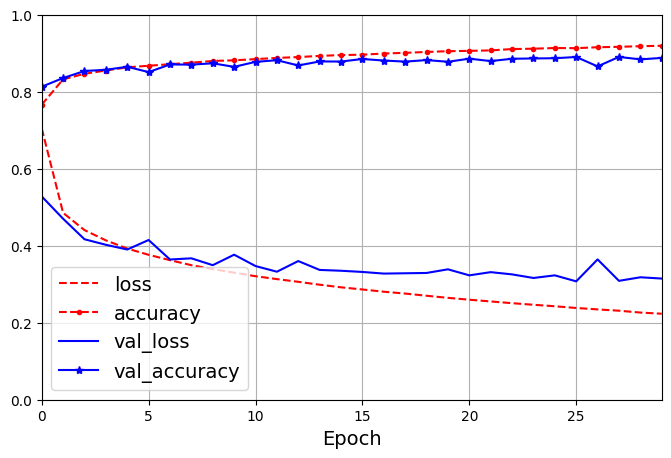

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [26]:
model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 463us/step - loss: 0.3331 - accuracy: 0.8807


[0.33307790756225586, 0.8806999921798706]

Using the model to make predictions

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 42ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = y_proba.argmax(axis=-1)
y_pred


array([9, 2, 1])

In [30]:
import numpy as np

np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [31]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

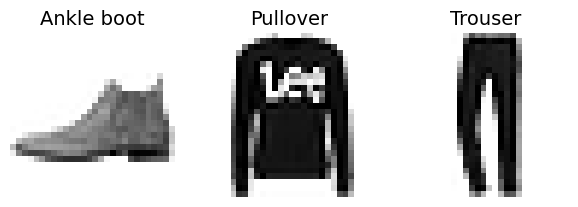

In [32]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()